# Stroke Prediction

## Описание задачи

Инсульт — острое нарушение кровоснабжения головного мозга (острое нарушение мозгового кровообращения, ОНМК), характеризующееся внезапным (в течение нескольких минут, часов) появлением очаговой и/или общемозговой неврологической симптоматики, которая сохраняется более 24 часов или приводит к смерти больного в более короткий промежуток времени вследствие цереброваскулярной патологии.
В датасете содержатся данные информация о некоторой группе людей, которая позволит предсказать вероятность возникновения инсульта. 

## Описание признаков:

1) id:  уникальный идентификатор



2) gender: "Male", "Female" or "Other" - пол пациента 



3) age: возраст пациента



4) hypertension:наличие гипертонии: 0 - у пациента нет гипертонии, 1 - у пациента зафиксирована гипертония



5) heart_disease: наличие сердечных заболеваний: 0 - у пациента нет сердечных заболеваний, 1 - у пациента зафиксированы сердечные заболевания



6) ever_married:состоит в браке: "No" или "Yes"



7) work_type: тип занятости: "children" - ребенок, "Govt_jov" - работает, "Never_worked"- никогда не работал, "Private" - частный работник, "Self-employed" - самозанятый



8) Residence_type: Тип местности, в который проживает пациент "Rural" - сельская, "Urban" - городская



9) avg_glucose_level: уровень глюкозы в крови



10) bmi: индекс массы тела



11) smoking_status: отношение к курению "formerly smoked" - бросил курить,  "never smoked" - никогда не курил, "smokes" -курит, "Unknown" - нет данных



12) stroke: инсульт  1 - у пациента зафиксирован инсульт, 0 - не зафиксирован


In [186]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn 
import seaborn as sns
import sklearn
%matplotlib inline

## Загрузка данных

In [187]:
url = "/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv"
data_raw = pd.read_csv(url)

In [188]:
type(data_raw)

pandas.core.frame.DataFrame

In [189]:
data_raw.shape

(5110, 12)

Число объектов - 5110; количество признаков - 12; число классов -2 (наличие или отсутствие инсульта)

In [190]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##  Визуализация данных

### Посмотрим предварительную зависимость наличия инсульта от некоторых данных о пациенте 

<Axes: xlabel='stroke', ylabel='count'>

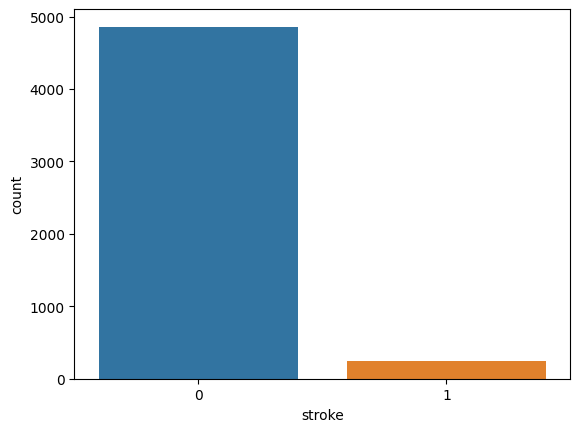

In [191]:
sns.countplot(x = 'stroke', data = data_raw)

Многие из пациентов, прошедших опрос, не сталкивались с инсультом

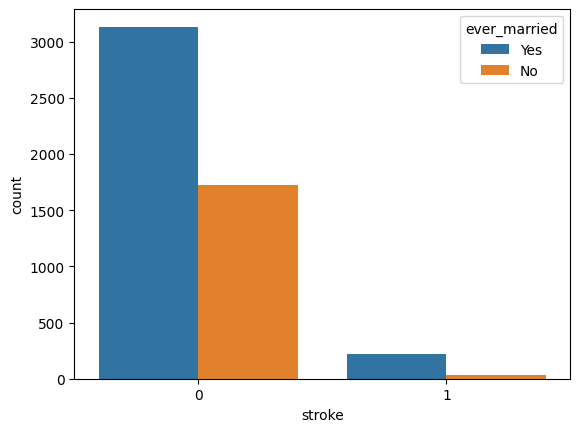

In [192]:
sns.countplot(x = 'stroke', hue = 'ever_married', data = data_raw)
pass

Видим, что многие из пациентов, предоставивших свои данные, состоят в браке

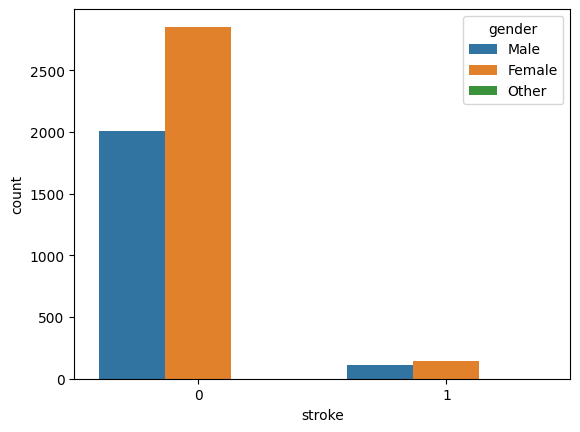

In [193]:
sns.countplot(x = 'stroke', hue = 'gender', data = data_raw)
pass

В опросе приняло участие больше женщин, чем мужчин

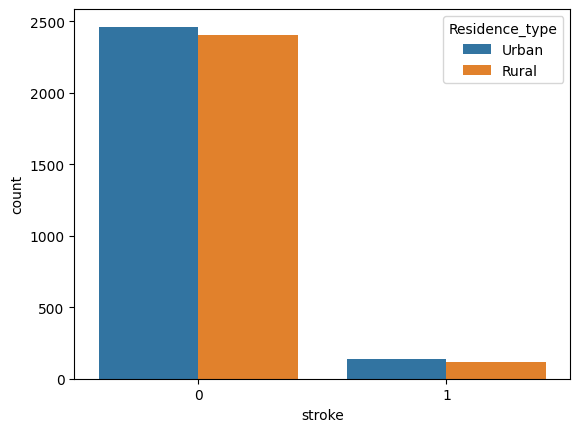

In [194]:
sns.countplot(x = 'stroke', hue = 'Residence_type', data = data_raw)
pass

Число людей проживающих в городской и сельской местности примерно одинаково

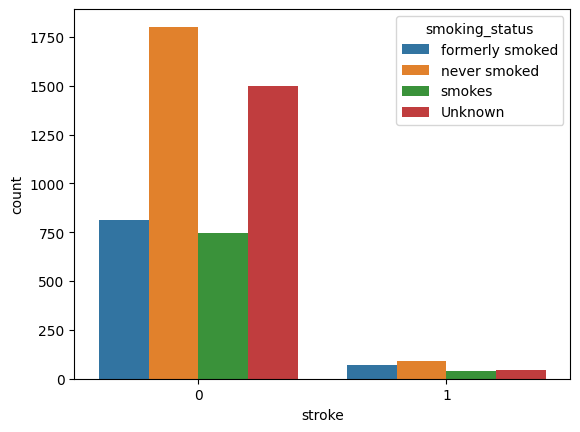

In [195]:
sns.countplot(x = 'stroke', hue = 'smoking_status', data = data_raw)
pass

Многие пациенты не предоставили данные о своем отношении к курению, так же многие сообщили, что никогда не курили

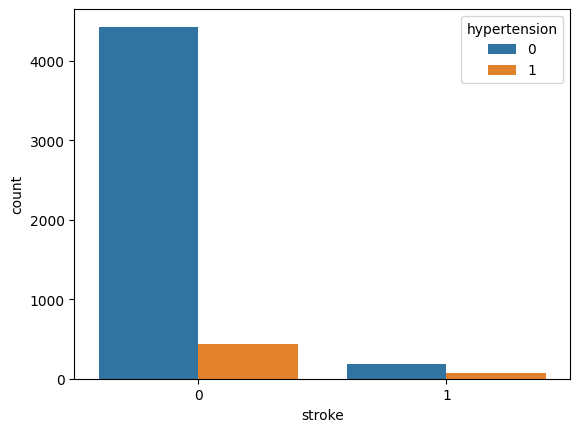

In [196]:
sns.countplot(x = 'stroke', hue = 'hypertension', data = data_raw)
pass

Многие  из пациентов не сталкивались с гипертонией

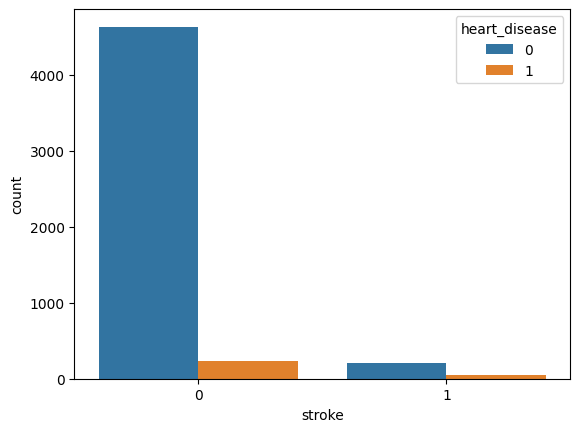

In [197]:
sns.countplot(x = 'stroke', hue = 'heart_disease', data = data_raw)
pass

Многие пациенты не страдают от сердечных заболеваний 

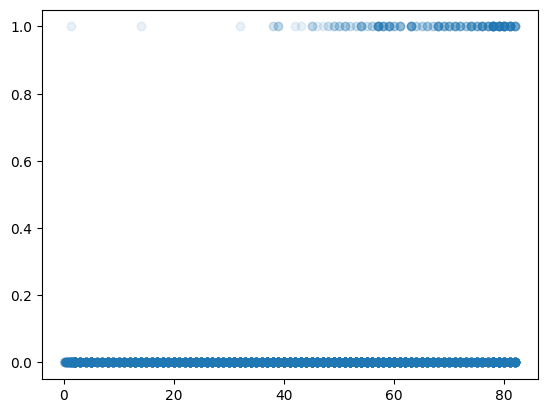

In [198]:
plt.scatter(data_raw['age'], data_raw['stroke'], alpha = 0.1)

Как показано на диаграмме, среди пациентов более старшего возраста инсульт встречается чаще

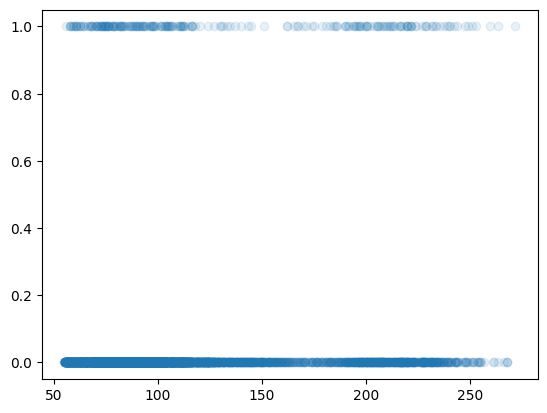

In [199]:
plt.scatter(data_raw['avg_glucose_level'], data_raw['stroke'], alpha = 0.1)

Видим, что меньше всего инсульту подвержены пациенты со средним уровнем глюкозы в крови

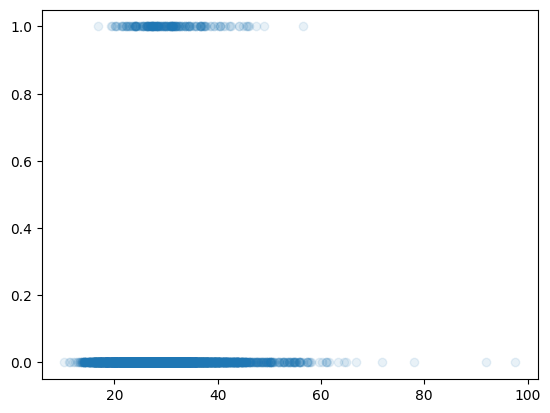

In [200]:
plt.scatter(data_raw['bmi'], data_raw['stroke'], alpha = 0.1)

Видим, что в статиску вошли в основном люди с различным индексом массы тела. На основе общепринятой расшифровки показателей индекса массы тела можно сделать вывод, что люди, страдающие ожирением (т.е. имеющие индекс больше 25) больше подвержены инсульту, чем люди с нормальным и недостаточным весом

## Преобразование датасета

В датасете присутствуют следуюие типы:

1. Gender, Hypertension, Heart Disease, Ever Married, Stroke, Residense Type - бинарные признаки;

2. Id, Age, Awd Glucose Level, BMI - числовые признаки;

3. Work Type, Smoking Status - категориальные признаки.

Проверим датасет на наличие пропущенных значений:

In [201]:
data_raw.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [202]:
data_raw['bmi'] = data_raw['bmi'].fillna(data_raw['bmi'].median())

In [203]:
probabilities = data_raw['smoking_status'].value_counts(normalize=True)
missing = data_raw['smoking_status'].isnull()
data_raw.loc[missing, 'smoking_status'] = numpy.random.choice(probabilities.index, size=len(data_raw[missing]), p=probabilities.values)

In [204]:
data_raw.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Обработка бинарных признаков

In [205]:
data_raw['gender'] = pd.factorize(data_raw['gender'])[0]
data_raw['ever_married'] = pd.factorize(data_raw['ever_married'])[0]
data_raw['Residence_type'] = pd.factorize(data_raw['Residence_type'])[0]

In [206]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,Private,0,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,0,Self-employed,1,202.21,28.1,never smoked,1
2,31112,0,80.0,0,1,0,Private,1,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,0,Private,0,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,Private,0,83.75,28.1,never smoked,0
5106,44873,1,81.0,0,0,0,Self-employed,0,125.20,40.0,never smoked,0
5107,19723,1,35.0,0,0,0,Self-employed,1,82.99,30.6,never smoked,0
5108,37544,0,51.0,0,0,0,Private,1,166.29,25.6,formerly smoked,0


Обработаем категориальные признаки:

In [207]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 479.2+ KB


In [208]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['ever_married'] = data_raw['ever_married'].astype('category')
data_raw['work_type'] = data_raw['work_type'].astype('category')
data_raw['Residence_type'] = data_raw['Residence_type'].astype('category')
data_raw['smoking_status'] = data_raw['smoking_status'].astype('category')

In [209]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


In [210]:
work_type_dummies = pd.get_dummies(data_raw['work_type'])
data_raw = pd.concat((data_raw, work_type_dummies), axis = 1)
data_raw = data_raw.drop(['work_type'], axis = 1)
smoking_status_dummies = pd.get_dummies(data_raw['smoking_status'])
data_raw = pd.concat((data_raw, smoking_status_dummies), axis = 1)
data_raw = data_raw.drop(['smoking_status'], axis = 1)

In [211]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,0,67.0,0,1,0,0,228.69,36.6,1,False,False,True,False,False,False,True,False,False
1,51676,1,61.0,0,0,0,1,202.21,28.1,1,False,False,False,True,False,False,False,True,False
2,31112,0,80.0,0,1,0,1,105.92,32.5,1,False,False,True,False,False,False,False,True,False
3,60182,1,49.0,0,0,0,0,171.23,34.4,1,False,False,True,False,False,False,False,False,True
4,1665,1,79.0,1,0,0,1,174.12,24.0,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,0,83.75,28.1,0,False,False,True,False,False,False,False,True,False
5106,44873,1,81.0,0,0,0,0,125.20,40.0,0,False,False,False,True,False,False,False,True,False
5107,19723,1,35.0,0,0,0,1,82.99,30.6,0,False,False,False,True,False,False,False,True,False
5108,37544,0,51.0,0,0,0,1,166.29,25.6,0,False,False,True,False,False,False,True,False,False


Матрица корреляции:

In [212]:
corr_mat = data_raw.corr()
corr_mat

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
id,1.000000,-0.001406,0.003538,0.003550,-0.001296,-0.013690,0.001403,0.001092,0.005555,0.006388,-0.000016,0.005459,0.023698,-0.019956,-0.013939,-0.019243,0.007812,0.011426,0.001004
gender,-0.001406,1.000000,0.027300,-0.021390,-0.085749,-0.029366,-0.005529,-0.054213,0.025958,-0.009200,0.016369,-0.011513,0.032959,0.025778,-0.089374,-0.059875,-0.041839,0.098436,-0.011638
age,0.003538,0.027300,1.000000,0.276398,0.263796,-0.679125,-0.014180,0.238171,0.324296,0.245257,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.378231,0.236897,0.119307,0.073133
hypertension,0.003550,-0.021390,0.276398,1.000000,0.108306,-0.164243,0.007913,0.174474,0.158293,0.127904,0.017685,-0.021608,-0.005413,0.115442,-0.129506,-0.141501,0.058853,0.065063,0.031240
heart_disease,-0.001296,-0.085749,0.263796,0.108306,1.000000,-0.114644,-0.003092,0.161857,0.036916,0.134914,0.001330,-0.015712,0.000027,0.086760,-0.091634,-0.066731,0.066804,-0.021856,0.044049
ever_married,-0.013690,-0.029366,-0.679125,-0.164243,-0.114644,1.000000,0.006261,-0.155068,-0.334911,-0.108340,-0.134041,0.090838,-0.153830,-0.192716,0.544441,0.332081,-0.171256,-0.102845,-0.105226
Residence_type,0.001403,-0.005529,-0.014180,0.007913,-0.003092,0.006261,1.000000,0.004946,0.000277,-0.015458,-0.013131,-0.022859,0.018173,-0.010594,0.002309,0.002036,-0.007654,0.024466,-0.027266
avg_glucose_level,0.001092,-0.054213,0.238171,0.174474,0.161857,-0.155068,0.004946,1.000000,0.166876,0.131945,0.013845,-0.014675,0.016588,0.062694,-0.102250,-0.095131,0.068111,0.023885,0.017646
bmi,0.005555,0.025958,0.324296,0.158293,0.036916,-0.334911,0.000277,0.166876,1.000000,0.036110,0.077856,-0.028327,0.203886,0.070160,-0.442102,-0.264915,0.103533,0.107636,0.084392
stroke,0.006388,-0.009200,0.245257,0.127904,0.134914,-0.108340,-0.015458,0.131945,0.036110,1.000000,0.002677,-0.014882,0.011888,0.062168,-0.083869,-0.055892,0.064556,-0.004129,0.008939


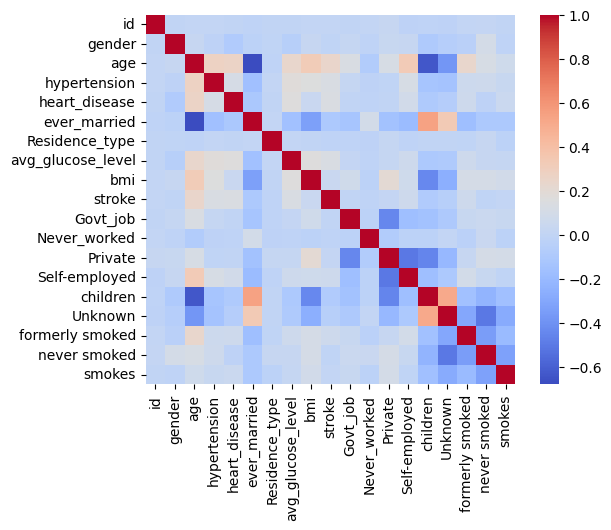

In [213]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

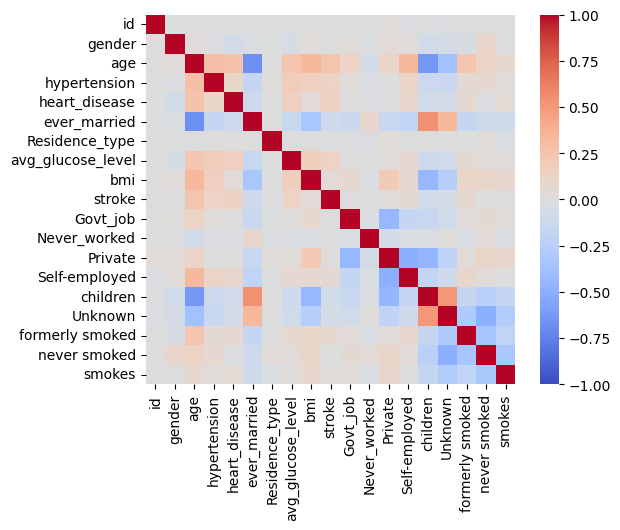

In [214]:
sns.heatmap(corr_mat, square=True, vmin = -1, vmax = 1, cmap ='coolwarm')
pass

На матрице корреляции для преобразованных данных хорошо видны очевидные закономерности: 



Чем младше участник опроса, тем вероятнее его типом занятости будет "Ребенок";



Чем старше пациент, тем выше его индекс массы тела;



Чем старше участник, тем вероятнее, что когда-либо он пробовал курить;



Чем старше участник, тем выше шанс, что он сталкивался с гипертонией, проблем с сердцем и тем вероятнее у него может быть инсульт;



Среди более старшего поколения больлше самозанятых и меньше тех, кто никогда не работал



И т.д.

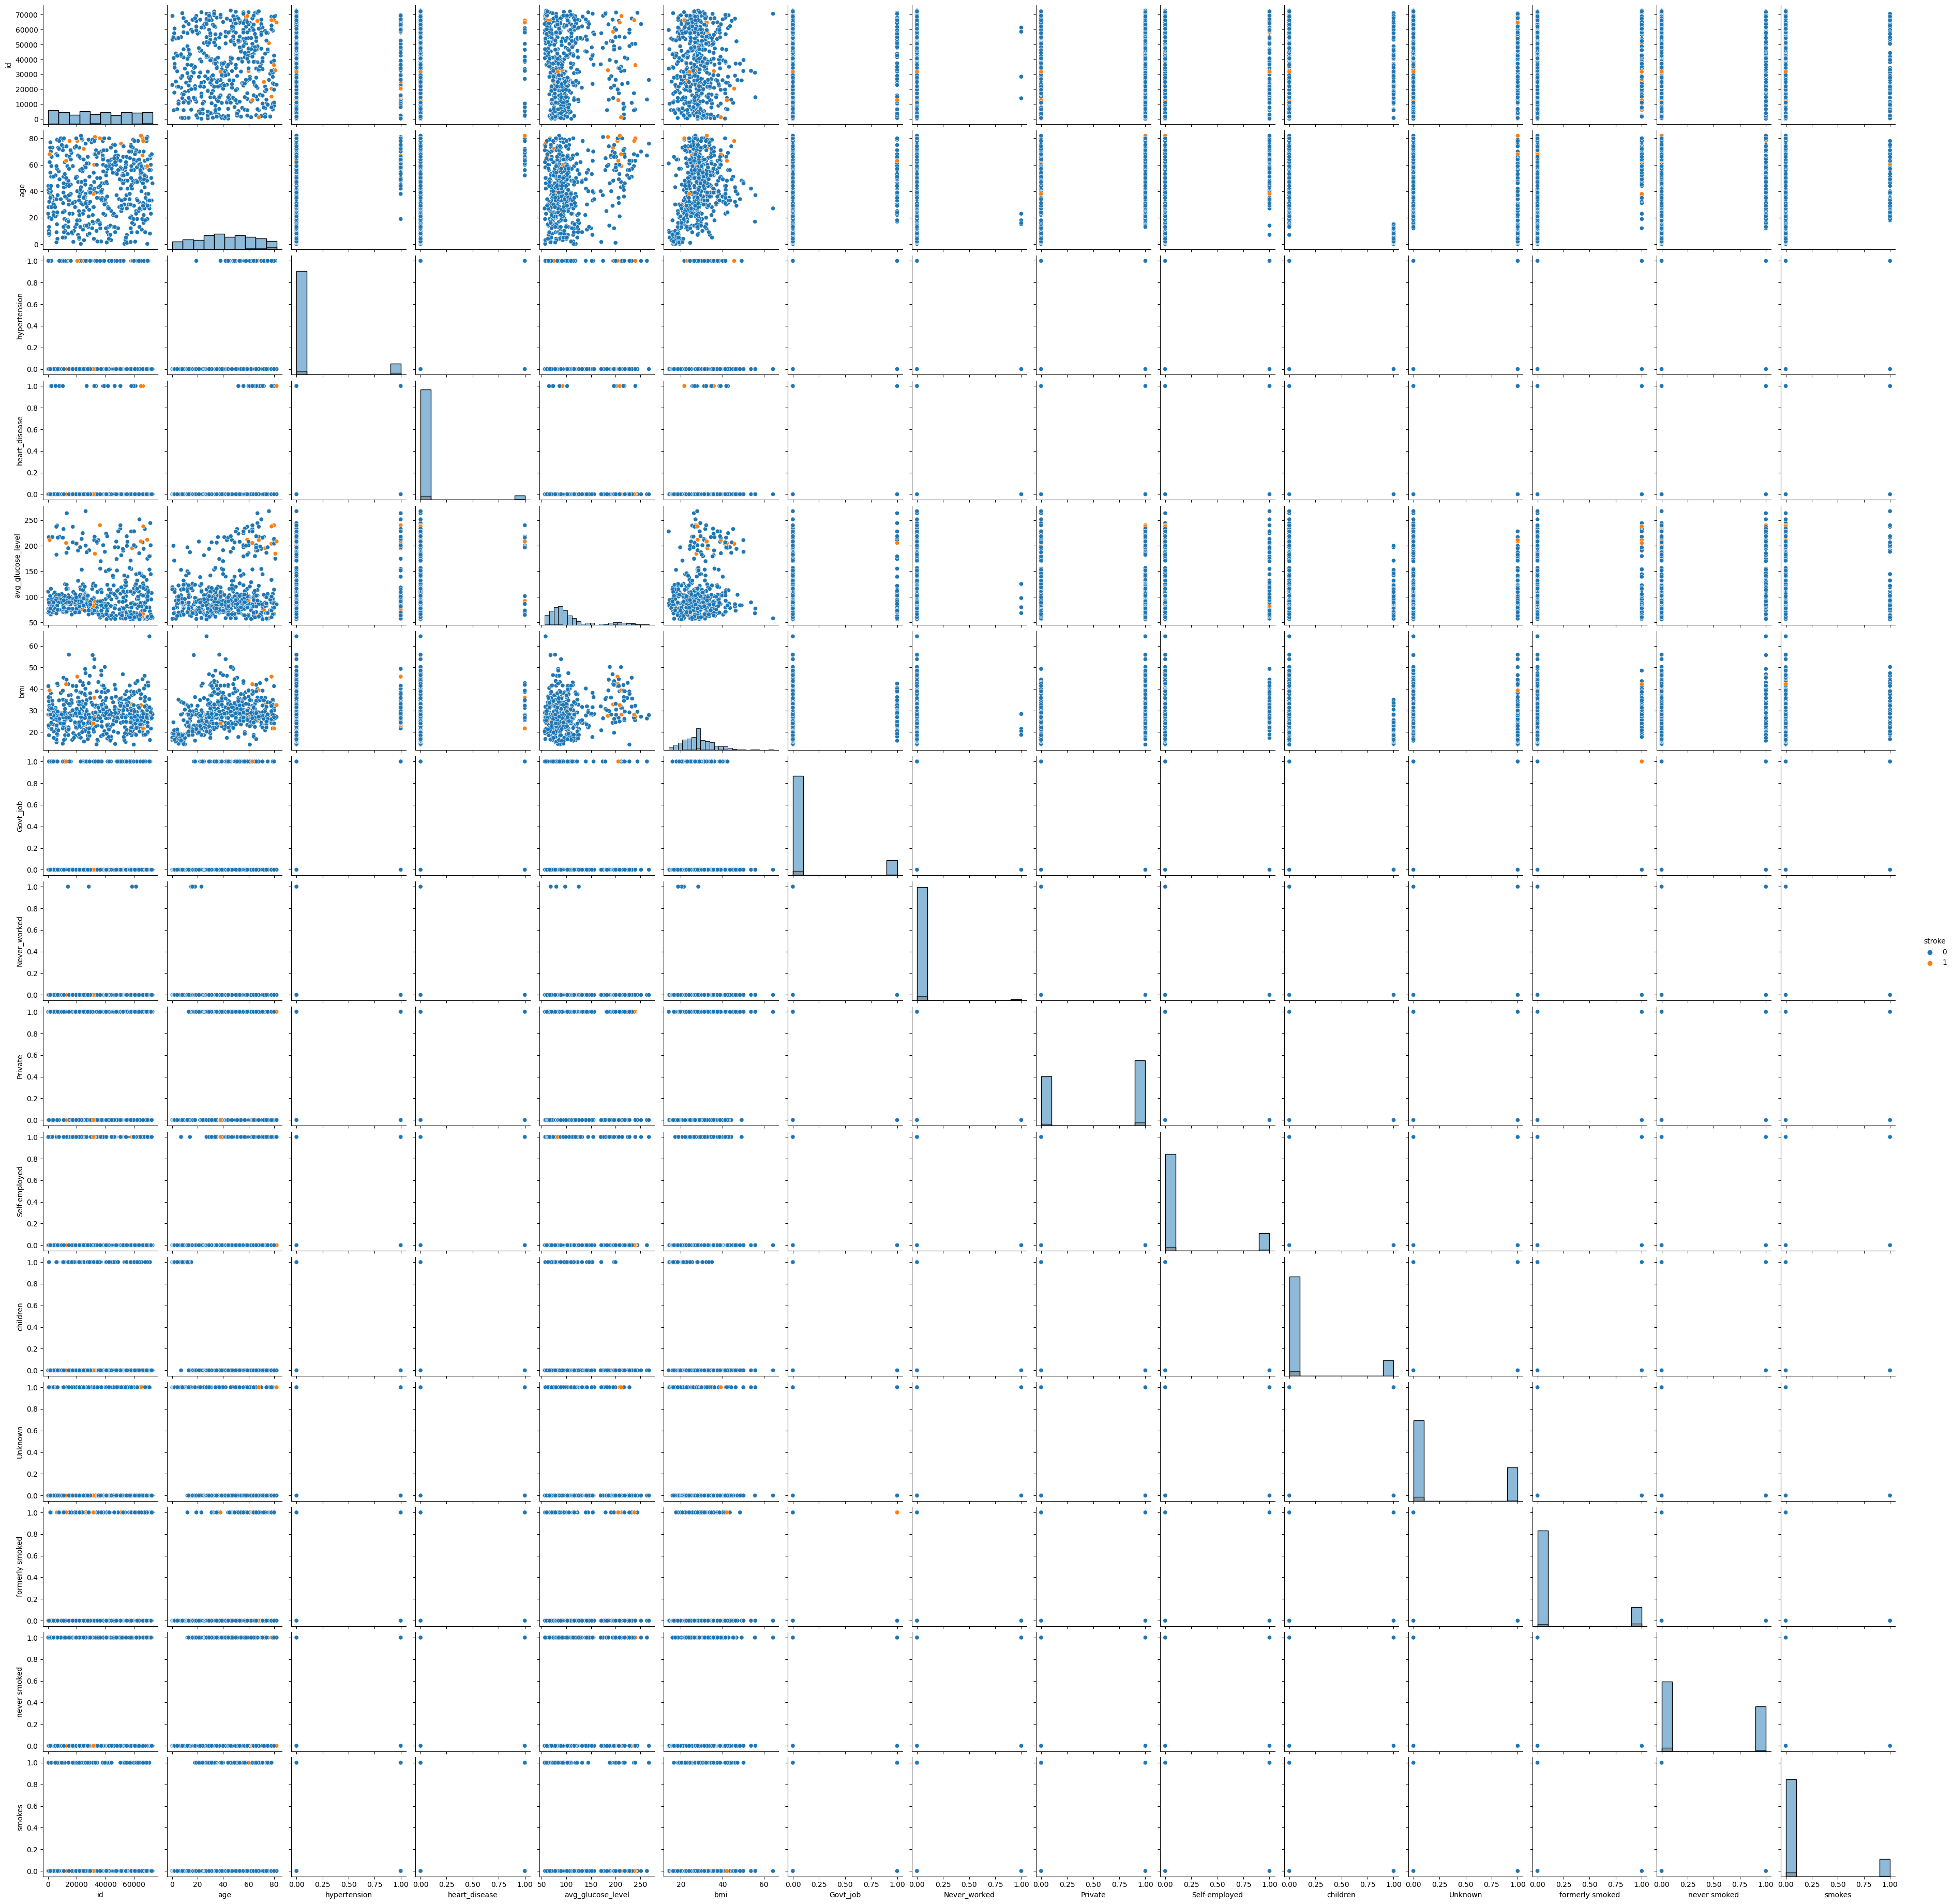

In [215]:
#random_subset = numpy.random.choice(numpy.arange(data_raw.shape[0]), size=500, replace=False)
#seaborn.pairplot(data_raw.iloc[random_subset], hue='stroke', diag_kind='hist')
data_raw = data_raw.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
# Получаем случайный подмассив
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)

# Строим график
sns.pairplot(data_raw.iloc[random_subset], hue='stroke', diag_kind='hist')

Нормализуем колличественные признаки:

In [216]:
data_raw['age'] = (data_raw['age'] - data_raw['age'].mean(axis=0))/data_raw['age'].std(axis=0)

data_raw['avg_glucose_level'] = (data_raw['avg_glucose_level'] - data_raw['avg_glucose_level'].mean(axis=0))/data_raw['avg_glucose_level'].std(axis=0)

data_raw['bmi'] = (data_raw['bmi'] - data_raw['bmi'].mean(axis=0))/data_raw['bmi'].std(axis=0)

In [217]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
count,5110.000000,5.110000e+03,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,3.893385e-17,0.097456,0.054012,1.001156e-16,-4.171484e-17,0.048728,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,21161.721625,1.000000e+00,0.296607,0.226063,1.000000e+00,1.000000e+00,0.215320,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,67.000000,-1.908074e+00,0.000000,0.000000,-1.126848e+00,-2.410791e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,-8.060363e-01,0.000000,0.000000,-6.382598e-01,-6.574445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,7.842450e-02,0.000000,0.000000,-3.149637e-01,-9.897124e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,7.859932e-01,0.000000,0.000000,1.753909e-01,5.114531e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,1.714677e+00,1.000000,1.000000,3.656787e+00,8.927516e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Классификация

In [218]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble

Разделим данные на тестовую и обучающую выборки в соотношении 1:3

In [219]:
x = data_raw.drop(['stroke'], axis=1)
y = data_raw['stroke']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=43)

#### Классификатор К ближайших соседей

Рассмотрим разное колличество соседей: 3 и 6

In [220]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.04801670146137787, Test: 0.050078247261345854


In [221]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=6)
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.05167014613778706, Test: 0.03990610328638498


Random forest

In [222]:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train.values, y_train.values)
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)
print("Train: {}, Test: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Train: 0.0, Test: 0.041471048513302036


## Выводы

С увеличением числа соседей погрешность может уменьшаться, т. е. увеличиваться точность классификатора.
Классификатор Random forest дает погрешность, схожую с погрешностью классификатора k-соседей.